In [1]:
#import necessary libs

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# read csv into a df

df = pd.read_csv('your_csv_location')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


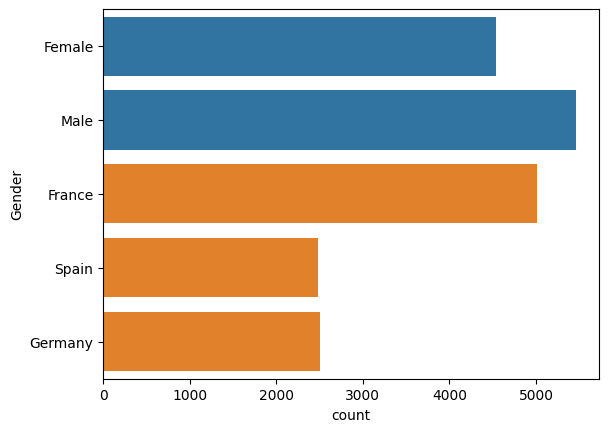

In [3]:

# bar plot for categorical variables

cat_cols = df[['Gender','Geography']]

for col in cat_cols:
    sns.countplot(df[col])


In [4]:
# one-hot encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


df = pd.get_dummies(df, columns=['Geography'], drop_first=True)




In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Gender             10000 non-null  int32  
 5   Age                10000 non-null  int64  
 6   Tenure             10000 non-null  int64  
 7   Balance            10000 non-null  float64
 8   NumOfProducts      10000 non-null  int64  
 9   HasCrCard          10000 non-null  int64  
 10  IsActiveMember     10000 non-null  int64  
 11  EstimatedSalary    10000 non-null  float64
 12  Exited             10000 non-null  int64  
 13  Geography_Germany  10000 non-null  bool   
 14  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int32(1), int64(9), object(1)
memory usage: 996

In [7]:
# check for null
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# drop the columns
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True,errors='ignore')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int32  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int32(1), int64(7)
memory usage: 761.8 KB


<Axes: >

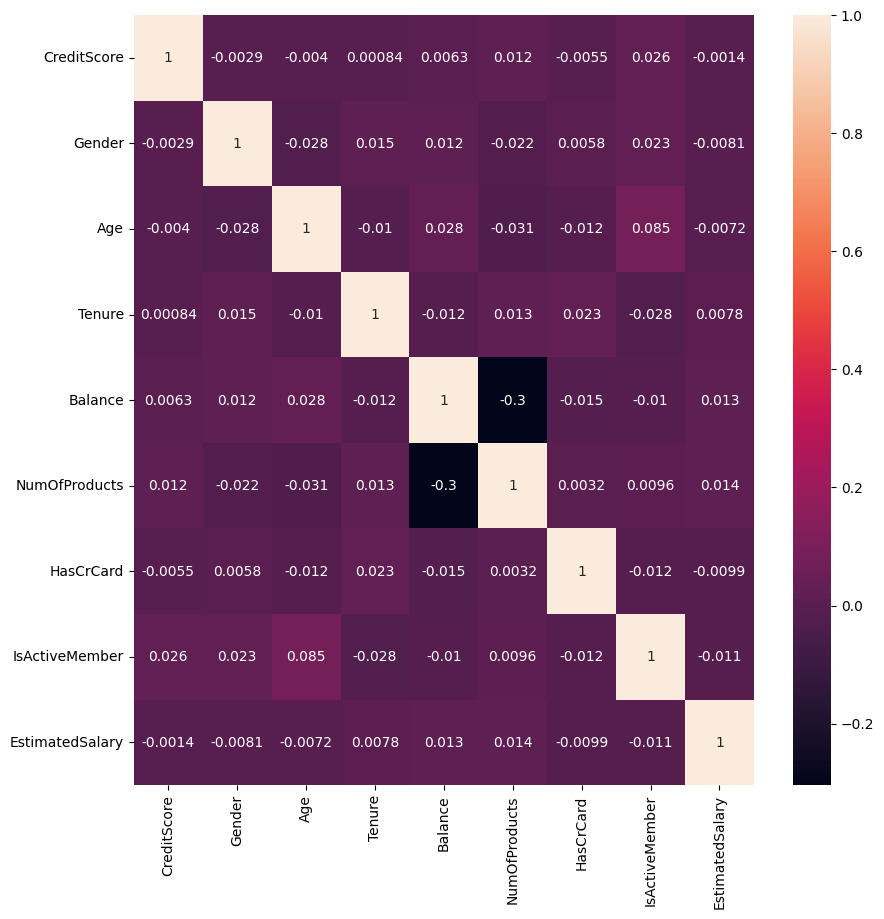

In [24]:
# plot correlation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes('number').corr(),annot=True)

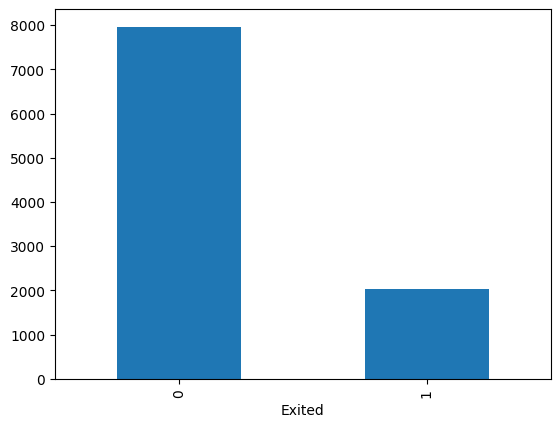

In [12]:
# distibution of outcome 

import matplotlib.pyplot as plt

df.Exited.value_counts().plot(kind='bar')

df.Exited = df.Exited.astype('bool')

In [13]:
# train test split 

X = df.drop('Exited', axis=1)
y = df.Exited

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit scaler on training only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Transform test using the same scaler
X_test_scaled = scaler.transform(X_test)


In [14]:
#print shape of training and test

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

model = Sequential()

    # Layer 1
model.add(Dense(128, input_dim=11, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

    # Layer 2
model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

    # Layer 3
model.add(Dense(32, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

    # Output Layer
model.add(Dense(1, activation='sigmoid'))

    # Compile
model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

# Model training (example)
# Model training (example)
history = model.fit(X_train_scaled, y_train,
                    epochs=150,
                    batch_size=10,
                    validation_data=(X_test_scaled, y_test))


Epoch 1/150


c:\Users\pradeeps2\code\text-generation-webui\installer_files\env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6887 - loss: 0.7394 - val_accuracy: 0.8375 - val_loss: 0.5066
Epoch 2/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8096 - loss: 0.5624 - val_accuracy: 0.8450 - val_loss: 0.4711
Epoch 3/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8088 - loss: 0.5360 - val_accuracy: 0.8495 - val_loss: 0.4457
Epoch 4/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8169 - loss: 0.5053 - val_accuracy: 0.8530 - val_loss: 0.4303
Epoch 5/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8260 - loss: 0.4753 - val_accuracy: 0.8530 - val_loss: 0.4095
Epoch 6/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8274 - loss: 0.4620 - val_accuracy: 0.8575 - val_loss: 0.3976
Epoch 7/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8271 - loss: 0.4498 - val_accuracy: 0.8540 - val_loss: 0.3988
Epoch 8/150
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8327 - loss: 0.4453 - val_accuracy: 0.8485

In [21]:
# predict the test data

y_pred = model.predict(X_test_scaled)

y_pred = y_pred > 0.5
# find accuracy

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.8615
[[1552   55]
 [ 222  171]]
              precision    recall  f1-score   support

       False       0.87      0.97      0.92      1607
        True       0.76      0.44      0.55       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

